## Introduction

This is the project of Sprint 10: Machine Learning on Business. In this project I will apply business concepts applied to machine learning concepts, A/B tests, bootstrapping and cross validation on a project focused for OilyGiant, an oil extraction company seeking where to open 200 new oil wells.

### Explaining the case

We are working on an oil extraction company named OilyGiant, and they have requested us to find the best locations for 200 future oil wells. They gave us raw data from samples of three regions, knowing the parameters of each well on the regions, and want to know the region with the best profit margin.

## Read the data

Knowing this, we first need to see the information OilyGiant gave us. Once we confirm the information is as we need it to be we can continue and proceed to further steps.

### Importing libraries

In this block code are the libraries/modules needed for the project.

In [1]:
import math
import locale
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

locale.setlocale(locale.LC_ALL, '')
DataFrame = pd.DataFrame({})

### Reading the datasets

Now we are saving the datasets we were given on variables `reg0`, `reg1` and `reg2`. Each of these variables has the geological information for each of the three regions where OilyGiant may want to dig on next. As contract details and each well characteristics  cannot be published all the data is synthetic.

In [2]:
reg0 = pd.read_csv('/datasets/geo_data_0.csv')
reg1 = pd.read_csv('/datasets/geo_data_1.csv')
reg2 = pd.read_csv('/datasets/geo_data_2.csv')

The information on these three datasets is distributed the same way and has the same number of rows, but the data vary due to the region difference between them.

The columns for all the datasets are the following:

* `id`: Oil well unique identifier.
* `f1`, `f2`, `f3`: Characteristics of the wells (this information is encoded but its values are significant).
* `product`: Reserve volume on the oil well (thousands of barrels). Each product unit is equivalent to $4500 USD.

Knowing this we now know which columns are our features and which column is our target:

* `features`: id, f0, f1, f2.
* `target`: product.

Let's see how this data is distributed on all the three datasets.

#### Dataset `geo_data_0.csv`

In [3]:
reg0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
reg0.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,Tdehs,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


We can see the dataset `geo_data_0` does not have missing values and each column has a appropiate data type. On the other hand we can see the column `f2` has a mean and standard deviation values much higher than columns `f0 & f1`, so we need to scalate our data to have similar values. 

In case of columns `id` and `product` we do not need to apply any changes, this is because `id` column has alphanumerical values and an encoding process for those values will not generate any change because almost all values on it are uniques, and `product` column is our target and it has no sense scaling our target values.

#### Dataset `geo_data_1.csv`

In [5]:
reg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
reg1.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,5ltQ6,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


Similar to the previous dataset, on dataset `geo_data_1` we need to scalate columns `f0, f1 & f2`, but in this case all our columns have mean and standard deviation values quite different one to another. We have no missing values and no data type changes needed on the columns of the dataset.

Columns `id & product` remain the same as they are for the same reasons mentioned on previous section.

#### Dataset `geo_data_2.csv`

In [7]:
reg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
reg2.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,VF7Jo,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


Dataset `geo_data_2` is quite similar to dataset `geo_data_0`. We will apply the same scaling process and remain other columns as they are.

## Conditions before start the work

For this project we must follow the next conditions:

Conditions:

* Only Linear Regression can be used.
* While exploring the region, 500 points are studied and the best 200 points are selected for the profit calculation.
* The budget for the new 200 oil wells is 100M USD.
* One oil barrel represents an income of 4.5 USD, and the profit of a product unit is 4500 USD. Product units are measured in thousands of barrels.
* After the risk evaluation, keep the regions with a loss risk less than 2.5%.
* From the regions that meet the criteria, select the one with the highest mean profit.

Once stated, let's move to the pre-processing steps.

## Preprocessing the data

First of all let's define our features and our target. We have already determined our features will be columns `id, f0, f1 & f2` and our target will be column `product`, therefore our distribution will be the following:

* Features: `id, f0, f1 & f2`.
* Target: `product`.

But we have to remove column `id` from our features to be processed because that information is not relevant for the task, so our distribution will be as the following:

* Features: `f0, f1 & f2`.
* Target: `product`.

In [9]:
reg0_feat = reg0.drop(["id", "product"], axis=1)
reg0_targ = reg0["product"]

reg1_feat = reg1.drop(["id", "product"], axis=1)
reg1_targ = reg1["product"]

reg2_feat = reg2.drop(["id", "product"], axis=1)
reg2_targ = reg2["product"]

## Training our models

Now we have our data processed we can continue to training our Linear Regression model and get predictions for our three interest regions. The following function `linearResults` will return a tuple of series objects with the predictions generated from the features validation set and other one with the target validation set, and at the same time prints important information about the the model trained (mean value, RMSE value, R2 value, number of locations where the minimum profit is achieved and mean cross validation score with 10 random samples).

Once we use this function on all our datasets features and target sets we can know how our models predicts our interest values.

In [10]:
def linearResults(features:DataFrame, target:DataFrame) -> tuple:
    
    """
    This function returns a series object with the predictions generated from the target valid set, and at the same time 
    prints important information about the the model trained (mean value, RMSE value, R2 value, number of locations where 
    the minimum profit is achieved and mean cross validation score with 10 random samples).
    
    Inputs:
        * features: Series-like, DataFrame-like
            - The feature(s) that will be used for the model
        * target: Series-like, DataFrame-like
            - The target(s) that will be used for the model
            
    Output:
        * predictions: Series
            - A dataframe-like object in which will be the predictions generated by the model.
            The shape of this variable will be (25% of target input rows & target input columns).
        * target_valid: Series
            - A dataframe-like object with the validation target set generated from the split process.
            The shape of this variable will be (25% of target input rows & target input columns).
    """
    
    # Splitting the sets
    features_train, features_valid = train_test_split(features, train_size=0.75, test_size=0.25, random_state=1234)
    target_train, target_valid = train_test_split(target, train_size=0.75, test_size=0.25, random_state=1234)
    
    # Training the model and generating the predictions
    model = LinearRegression().fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    # Getting the predictions mean and rmse values
    mean_target = predictions.mean()
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    r2 = r2_score(target_valid, predictions)
    cross_val = cross_val_score(model, features, target, cv=10)
    
    # Scatter plotting validation answers and predictions
    sns.regplot(x=target_valid, y=predictions, ci=None, color="b", line_kws=dict(color="r"))
    plt.plot(target_valid, predictions, 'o', alpha=0.3, label="Points")
    
    # Obtaining the values for the line that represents the linear regression
    m, b = np.polyfit(target_valid, predictions, 1)

    # Plotting "x", "y = mx + b" (straight line equation)
    plt.plot(target_valid, m*target_valid+b, label="Regression line")
    
    plt.xlabel("Validation set answers")
    plt.ylabel("Predictions")
    plt.title("Linear Regression plot")
    plt.grid()
    plt.legend()
    plt.show()
    
    # Returning our results
    print(f"Mean value: {mean_target}.")
    print(f"RMSE value: {rmse}.") 
    print(f"R2 value: {r2}.")
    print(f"Cross validation score: {(cross_val).mean()}.")
    print(f"Number of wells that reach the minimum profit: {sum((predictions > 111.1) * 1)}.")
    return pd.Series(predictions, index=target_valid.index), pd.Series(target_valid)

Once done, let's execute this function on each dataset and save our returned variables on the following variables:

* `geo_data_0`:

    -reg0_pred: Predictions from region 0 features validation set.
    
    -reg0_val: Real values for region 0 validation set.
    
    
* `geo_data_1`:

    -reg1_pred: Predictions from region 1 features validation set.
    
    -reg1_val: Real values for region 1 validation set.
    
    
* `geo_data_2`:

    -reg2_pred: Predictions from region 2 features validation set.
    
    -reg2_val: Real values for region 2 validation set.
    

### Geo-data 0

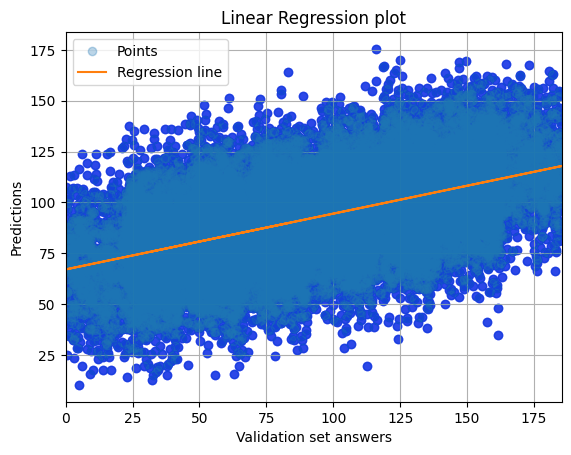

Mean value: 92.43045952558441.
RMSE value: 37.562394183637785.
R2 value: 0.2740586761361865.
Cross validation score: 0.27547024205606097.
Number of wells that reach the minimum profit: 5267.


In [11]:
reg0_pred, reg0_val = linearResults(reg0_feat, reg0_targ)

We can conclude the following from the model for dataset `geo_data_0`:

* The value R2 of 0.27 shows us the model is not predicting correctly the results.
* Mean and RMSE values differ widely from the desired values.
* Aproximately 25% of the predictions reach the minimum production per region to generate profit.

### Geo-data 1

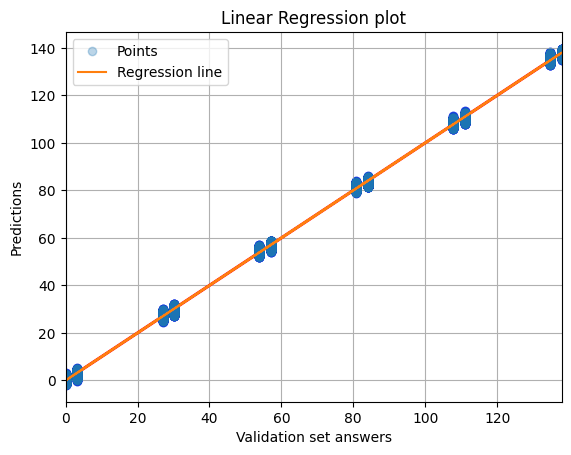

Mean value: 68.80248249798365.
RMSE value: 0.8939344738117704.
R2 value: 0.999619058765352.
Cross validation score: 0.9996243430392981.
Number of wells that reach the minimum profit: 4488.


In [12]:
reg1_pred, reg1_val = linearResults(reg1_feat, reg1_targ)

We can conclude the following from the model for dataset `geo_data_1`:

* The value R2 of 0.99 shows us the model is predicting correctly the results in a practical ideal way.
* Mean value differs widely from the desired mean value.
* RMSE value is practically ideal.
* Less than 25% of the predictions reach the minimum production per region to generate profit.

### Geo-data 2

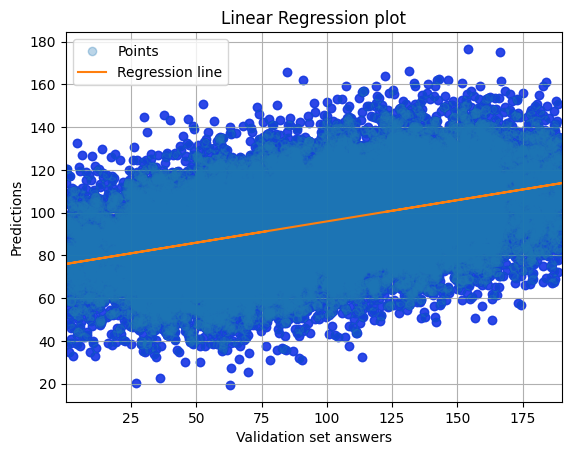

Mean value: 94.91573817913459.
RMSE value: 40.10318099258418.
R2 value: 0.1983301043994069.
Cross validation score: 0.19867018805197603.
Number of wells that reach the minimum profit: 5247.


In [13]:
reg2_pred, reg2_val = linearResults(reg2_feat, reg2_targ)

We can conclude the following from the model for dataset `geo_data_2`:

* The value R2 of 0.19 shows us the model is not predicting correctly the results.
* Mean and RMSE values differ widely from the desired values.
* Aproximately 25% of the predictions reach the minimum production per region to generate profit.

### Section conclusions

We have preprocessed our information as we were teached and used the Linear Regression model as we were told on section 3, eventhough this was not enough to assure a realistic or correct prediction model for neither of our datasets. This is because:

* `geo_data_0`: The model has a R2 score of 0.27 (much lower than a optimal value), and we can see this on the scatter plot in which for all the values of the validation target list the model predicts a new value within a wide range of values, which is not what we are looking for.
* `geo_data_1`: The model has results practically ideal (R2 score near 1) which may indicate the data does not define our parameters in the way needed. In case we can assure the data is not compromised in any way possible, we can use this model with no problem.
* `geo_data_2`: Similar to "geo_data_0", this model has a low R2 score. This model is even less reliable than the model for "geo_data_0" for the same reasons as "geo_data_0".

For academic purposes we will continue assuming all the results fit a realistic case and use them for future steps of the project.

## Profit

Now its time to determine how our bussiness model will be defined and the results of this bussiness model on our 3 prediction sets. 

###  Defining bussiness model

We were told on section 3 we need to select the top 200 regions of each dataset and get the highest profit possible. Initial considerations are as following:

* Initial investment: 100 million USD.
* Price per product unit: 4500 USD.
* Minimum production per region per region to be considered profitable: 111.1 product units (or 500,000 USD).

We will be using the `Return On Investment (ROI)` formula to define the profit for each dataset, it it the following:

-
<center><font size="5">$ROI = \frac{Net Profit - Investment}{Investment}$</font></center>

This is because we need to know how much profit we can get on a specific region with an initial investment (100 million USD), which is why the ROI formula is the adequate metric to use for this case.

We generated a new function `profitResutls` to know the profit for our predicted series objects of each dataset on section 5. This function will take as inputs the generated series objects and will return the top 200 regions of the set as a series object and will print the product units produced on the top 200 regions and the profit in percentage for each region.

In [14]:
def profitResults(real:DataFrame, predicted:DataFrame, num:int):
    
    """
    This function takes as input two DataFrame-like objects in which is saved the information from the targets values from
    validation set and the predicted values generated from validation set features, and a number which will be used as part 
    of a string with the information obtained for that set.
    
    Inputs:
        * real: Series-like, DataFrame-like
            - Variable with information from the validation set target values.
        * predict: Series-like, DataFrame-like
            - Variable with information from the prediction set values.
        * num: int
            - A number which represents the set region number.
            
    Output:
        * top: Series-like, DataFrame-like
            - A dataframe-like object with the best 200 values from the target input values.
    """
    
    top = predicted.sort_values(ascending=False).head(200)
    stock = sum(real[top.index])
    profit = (stock * 4500) - 100000000
    
    print(f"""The information of the top 200 locations on the region {num} is:\n
              Stocks: {math.ceil(stock*100)/100} product units.
              Profit: {locale.currency(math.ceil(profit*100)/100, grouping=True)} USD (or {math.ceil(profit/10000)/100}%).""")
    return top

Let's run this function on our 3 generated tuple sets and save the top 200 regions of each on new variables `reg0_top`, `reg1_top` & `reg2_top`.

### `geo_data_0` set

In [15]:
reg0_top = profitResults(reg0_val, reg0_pred, 0)

The information of the top 200 locations on the region 0 is:

              Stocks: 29831.17 product units.
              Profit: $34,240,263.21 USD (or 34.25%).


This region has a profit of 34.25% or 29,831.17 product units production. This region has the highest profit among all the regions.

### `geo_data_1` set

In [16]:
reg1_top = profitResults(reg1_val, reg1_pred, 1)

The information of the top 200 locations on the region 1 is:

              Stocks: 27589.09 product units.
              Profit: $24,150,866.97 USD (or 24.16%).


This region has a profit of 24.16% or 27,589.09 product units production. This region has the least profit among all the regions.

### `geo_data_2` set

In [17]:
reg2_top = profitResults(reg2_val, reg2_pred, 2)

The information of the top 200 locations on the region 2 is:

              Stocks: 27899.91 product units.
              Profit: $25,549,554.25 USD (or 25.55%).


This region has a profit of 25.55% or 27,899.91 product units production. This region has a profit slightly higher that region 1.

### Choosing the best region

Using the information obatined unitl now, we conclude `region 0 has the highest profit` and we should build 200 new oil wells. But first let's clarify some points:

* Dataset `geo_data_0` has a `poor performance in the Linear Regression model`, but it got the `highest profit` amount among all regions. This may indicate us this region is `potentialy` full of resources we can get and `if we improve our predictions we can get a profit even higher than the one we have`. Let's remember we use the index from the predicted production values to sum the real production values, so if we improve our predictions we should get a higher profit using this same logic.
* Dataset `geo_data_1` is the only one which had a good performance in the Linear Regression model, but has the lowest profit value among all the regions. This probably indicates the regions does not have as much resources as we may want, so it's probable we may not want to biuld the new 200 wells on this set of regions.
* Dataset `geo_data_2` has a slightly higher profit value than dataset `geo_data_1`. Same as in `geo_data_0`, our predictions were not as reliable as we want and this caused our profit values were not as high as they would be. This may mean regions on this dataset has a moderate amount of resources, which is not bad at all but is not what OilyGiant is looking for.

`IN CONCLUSION`

Our data indicates regions on dataset `geo_data_0` have the highest profit possible compared to regions on datasets `geo_data_1` and `geo_data_2`, but it is not recommended to determine an action yet. It is important to be as sure as possible our information is as accurate as it can be, and our predictions for datasets `geo_data_0` and `geo_data_2` need to be improved to assure an appropiate answer.

## Applying statistical analysis to determine the best set of regions

Now is time to apply some statistical analysis to know the relation from the real mean profit value, the confidence interval and the risk probability for the three regions. To make this possible we need to apply a `bootstrap` processing and get a mean distribution of possible mean values we may get.

For this we made a function `bootstrap` in which we put our target values (the top 200 regions series object we got on section 6) and get a series object with the profit mean distribution for a "replaced" sample of n-values of lenght 1000.

In [24]:
def bootstrap(real:DataFrame, predict:DataFrame, n:int=500):
    
    """
    This function uses as inputs two dataframe objects wi which we have the information from the targets values from
    validation set and the predicted values generated from validation set features, and a number 'n' used to apply a 
    bootstrap process with 500 "replaced-population" for a "n-lenght sample" obatined from the target input (be default). 
    This generates a distribution of total profit values in USD and returns it as a series object and also two varaibles
    "lower" and "upper" which represents the value for the 2.5% percentile and 97.5% percentile (confidence interval of 95%).
    
    Inputs:
        * real: Series-like, DataFrame-like
            - Variable with information from the validation set target values.
        * predict: Series-like, DataFrame-like
            - Variable with information from the prediction set values.
        * n: int
            - The lenght of the sample that will be used for the bootstrap process.
            
    Output:
        * vals: Series-like
            - The total profit values distribution generated.
        * lower: float
            - The value for the 2.5% percentile.
        * upper: float
            - The value for the 97.5% percentile.
    """

    random = np.random.RandomState(0)
    values = []
    
    for i in range(1000):

        preds = predict.sample(n=n, replace=True, random_state=random).sort_values(ascending=False).head(200).index
        values.append((real[preds].sum() * 4500) - 100000000)
        
    vals = pd.Series(values)
    risk = (((vals < 0) * 1).sum() / len(vals)) * 100
    lower = vals.quantile(0.025)
    upper = vals.quantile(0.975)
    
    print(f"Mean profit: {locale.currency(math.ceil(vals.mean()*100)/100, grouping=True)}.")
    print(f"Confidence interval: ({locale.currency(math.ceil(lower*100)/100, grouping=True)}, {locale.currency(math.ceil(upper*100)/100, grouping=True)}).")
    print(f"Risk probability: {risk}%.")
        
    return vals, lower, upper

Now we have this defined, let's test it for all our our top 200 lists with a bootstrap of 1000 samples and a confidence interval of 95%. Once obtained the information let's plot the distriburtion on an histogram and obtain the following information:

* Mean profit of the whole distribution (a mean profit of 0 means there is no profit, only recovering the initial investment).
* Confidence interval of the distribution (a range with values less than 0 represents loss).
* Risk of loss probability of the dsitribution (a value more than 0 means there are regions with loss).

### `geo_data_0` set

Mean profit: $3,896,140.74.
Confidence interval: (-$1,239,882.72, $8,762,442.98).
Risk probability: 6.3%.


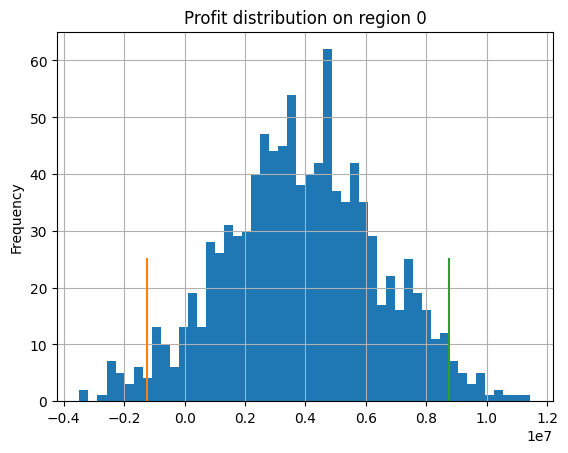

In [25]:
reg0_boot, reg0_lower, reg0_upper = bootstrap(reg0_val, reg0_pred)

reg0_boot.plot(kind='hist',
              title="Profit distribution on region 0",
              bins=50,
              grid=True)
plt.plot([reg0_lower, reg0_lower], [0, 25])
plt.plot([reg0_upper, reg0_upper], [0, 25])
plt.show()

The `geo_data_0` distribution give us the following information:

* Mean total profit for the set: 3,896,140.74 USD.
* Confidence interval: (-1,239,882.72, 8,762,442.98) (7,522,560.26 USD difference).
* Risk of loss probability: 6.3%.

### `geo_data_1`set

Mean profit: $4,275,081.96.
Confidence interval: ($317,601.40, $8,165,696.45).
Risk probability: 1.0999999999999999%.


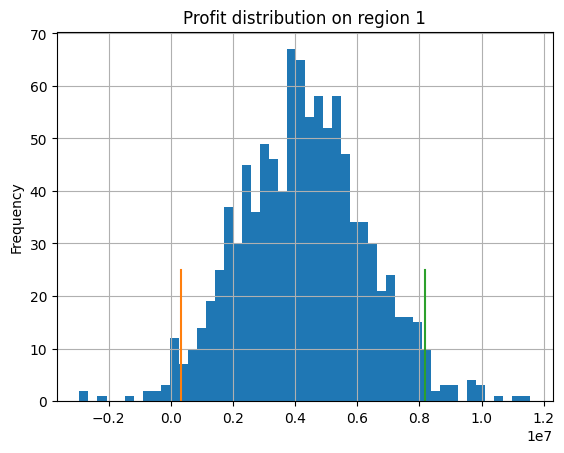

In [26]:
reg1_boot, reg1_lower, reg1_upper = bootstrap(reg1_val, reg1_pred)

reg1_boot.plot(kind='hist',
              title="Profit distribution on region 1",
              bins=50,
              grid=True)
plt.plot([reg1_lower, reg1_lower], [0, 25])
plt.plot([reg1_upper, reg1_upper], [0, 25])
plt.show()

The `geo_data_1` distribution give us the following information:

* Mean total profit for the set: 4,275,081.96 USD.
* Confidence interval: (317,601.40, 8,165,696.45) (7,848,095.05 USD difference).
* Risk of loss probability: 1.09%.

### `geo_data_2` set

Mean profit: $3,632,710.52.
Confidence interval: (-$1,704,269.37, $8,964,982.75).
Risk probability: 8.6%.


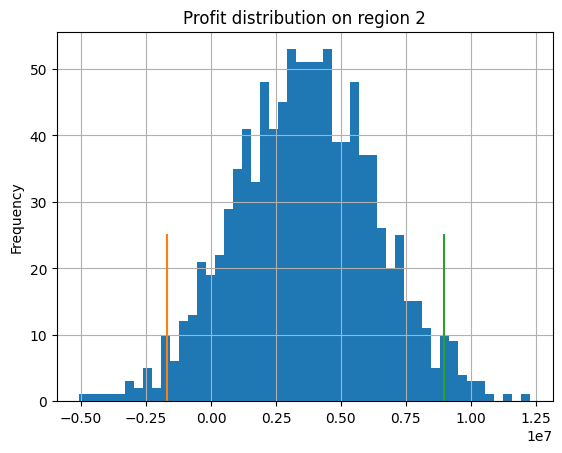

In [27]:
reg2_boot, reg2_lower, reg2_upper = bootstrap(reg2_val, reg2_pred)

reg2_boot.plot(kind='hist',
              title="Profit distribution on region 2",
              bins=50,
              grid=True)
plt.plot([reg2_lower, reg2_lower], [0, 25])
plt.plot([reg2_upper, reg2_upper], [0, 25])
plt.show()

The `geo_data_2` distribution give us the following information:

* Mean total profit for the set: 3,632,710.52 USD.
* Confidence interval: (-1,704,269.37, 8,964,982.75) (10,669,252.12 USD difference).
* Risk of loss probability: 8.6%.

### Conclusions

1.- The information obtained on section 7.1 - 7.3 indicates that only `regions on dataset "geo_data_1" shall be used on to build the new 200 oil wells`. Regions on datasets `geo_data_0` & `geo_data_2` have a risk probability higher than the 2.5% threshold.

2.- The confidence intervals from all regions states the variance of profit among regions with a 95% confidence level likely related to the R2 scores values from the Linear Regression model:

    *geo_data_0: 3,896,140.74 USD (R2 score = 0.27).
    *geo_data_1: 4,275,081.96 USD (R2 score = 0.99).
    *geo_data_2: 3,632,710.52 USD (R2 score = 0.19).

3.- The bootstrapping process indicates the regions on `geo_data_1` have the highest profit available, but it is important to remark this may change if we can improve the predictions for regions on datasets `geo_data_0` & `geo_data_2`. We can continue with this conclusion because we are sure it gives the company a profit, but we cannot assure this is the best decision possible due to the poorly predicted values on 2 of our datasets.

Maybe we should verify if using a more complex prediction model or maybe to generate a new set of data with a new information would give us a better solution of the problem we have (also we can generate new KPIs values if we are sure that data will be important to the project, but is risky).

`IN CONCLUSION`

The set of regions with the highest profit obtained is `geo_data_1`. Eventhough, it is recommended to process the information with a more complex model and/or strategies to assure this set is the best group of regions possible.

## General conclusions

1.- Translate bussiness concepts is important in a data scientist work because it gives us the keys to communicate confidence and risk values on each of the strategies we want to analyze in the company. In this project case the `Return Over the Investment` value was the key value for our analysis and also complement it with probability concepts as `confidence interval` and `risk probability` to add value to our conclusions.

2.- It's valid to test different strategies and technologies to solve a problem as we conclude on section 7.4, but this must always be considered by the data scientist during the project's development, except you are ask to only use a limited number of tools (as we had on this project using Linear Regression).

3.- It is important to properly communicate a situation in which we do not have a profit, and tools as bootstrapping can help us to find the distribution of the interest variable and comprehend the risks of the values we got.